In [47]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [14, 6]
matplotlib.rcParams['axes.grid'] = True

In [48]:
%load_ext autoreload
%autoreload 2

import sys
sys.version_info

import sys
sys.path.insert(0, '../')


import numpy as np
import matplotlib.pyplot as plt

from lib_data import *

import random

from tqdm.notebook import tqdm
from lib_lsh import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
load_workspace(vars(), filename='25shot_may18')

Loaded: mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, 


In [50]:
y_new = y_new[:len(qs_new)]

In [51]:
hash_planes = np.random.randn(32, 64) 
hash_key = [get_lsh(k, hash_planes) for k in mem_keys]

In [52]:
y_true = []
y_preds= []

for i, (qq, yy) in enumerate(zip(qs_new, y_new)): 

    q_hash = get_lsh(qq, hash_planes).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.9


In [53]:
y_true = []
y_preds= []

for i, (qq, yy) in enumerate(zip(qs, y)): 

    q_hash = get_lsh(qq, hash_planes).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.854


In [54]:
from dpe import DPE

dpe = DPE('COM9')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


....

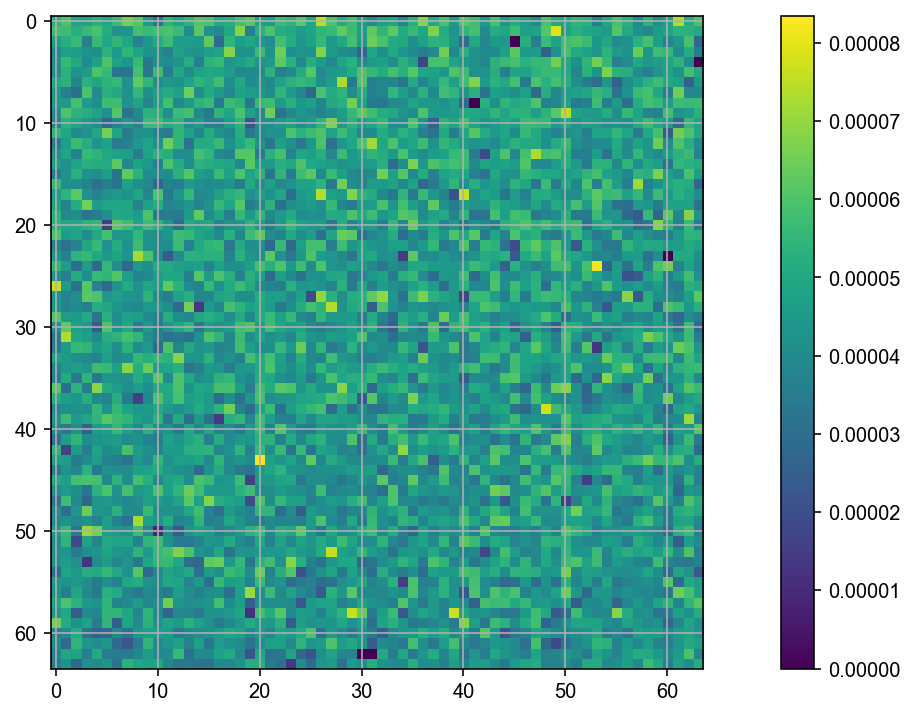

In [55]:
g = dpe.read(0, method='slow')
plt.imshow(g)
plt.colorbar()

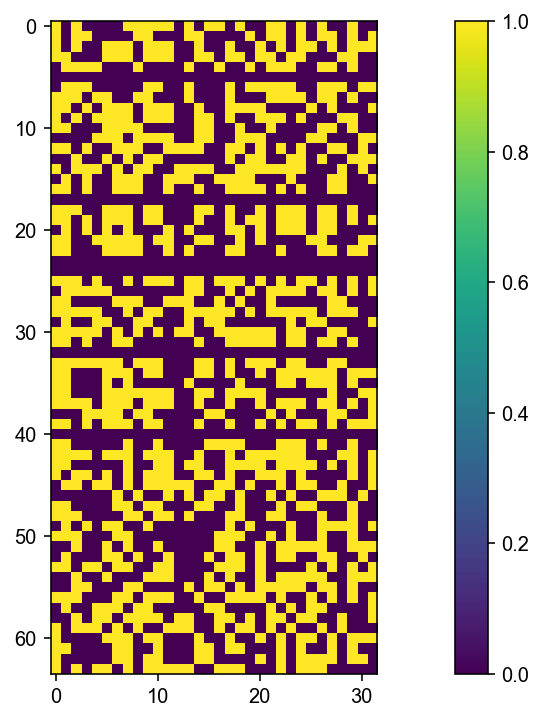

In [74]:
hash_key = [get_lsh_g(k, g) for k in tqdm(mem_keys)]

plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

In [78]:
y_true = []
y_preds= []

qs_hash_new = []

for i, (qq, yy) in tqdm(enumerate(zip(qs_new, y_new)), total=len(y_new)):
#     if i==0:
#         continue
        
    q_hash = get_lsh_g(qq, g).reshape(-1)
    
    qs_hash_new.append(q_hash)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.9


In [79]:
y_true = []
y_preds= []

qs_hash = []

for i, (qq, yy) in tqdm(enumerate(zip(qs, y)), total=len(y)):
#     if i<125:
#         continue
        
    q_hash = get_lsh_g(qq, g).reshape(-1)
    
    qs_hash.append(q_hash)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.86


In [80]:
save_workspace(vars(), note='lsh-hardware-g-5-qs_hash')

Saving In(<class 'list'>), Out(<class 'dict'>), mem_vals(<class 'numpy.ndarray'>), mem_keys(<class 'numpy.ndarray'>), x(<class 'list'>), y(<class 'list'>), x_new(<class 'list'>), y_new(<class 'list'>), qs(<class 'list'>), qs_new(<class 'list'>), hash_planes(<class 'numpy.ndarray'>), hash_key(<class 'list'>), y_true(<class 'numpy.ndarray'>), y_preds(<class 'numpy.ndarray'>), i(<class 'int'>), qq(<class 'numpy.ndarray'>), yy(<class 'numpy.ndarray'>), q_hash(<class 'numpy.ndarray'>), distance(<class 'numpy.ndarray'>), g(<class 'numpy.ndarray'>), q(<class 'numpy.ndarray'>), qs_input(<class 'numpy.ndarray'>), rand_vecs(<class 'numpy.ndarray'>), vec_pos(<class 'numpy.ndarray'>), vec_neg(<class 'numpy.ndarray'>), out_pos(<class 'numpy.ndarray'>), out_neg(<class 'numpy.ndarray'>), output(<class 'numpy.ndarray'>), g_true(<class 'numpy.ndarray'>), output_soft(<class 'numpy.ndarray'>), output_soft2(<class 'numpy.ndarray'>), c(<class 'int'>), lin_cor_lsh(<class 'list'>), output_cor(<class 'numpy.n

In [59]:
import lib_lsh_batch as lsh

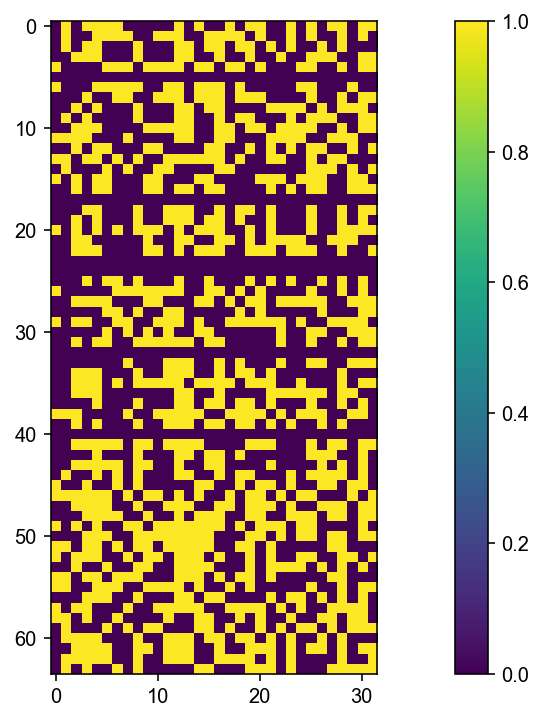

In [71]:
mem_keys = mem_keys / abs(mem_keys).max()


hash_key = lsh.get_lsh_g(mem_keys, g)

plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

In [72]:
q_hash = lsh.get_lsh_g(np.squeeze(qs_new), g)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y_new)):
    if i==0:
        continue
        
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.8947368421052632


In [73]:
q_hash = lsh.get_lsh_g(np.squeeze(qs), g)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y)):
    if i<125:
        continue
        
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.8346666666666667


In [20]:
save_workspace(vars(), note='lsh-hardware-g-4')

Saving In(<class 'list'>), Out(<class 'dict'>), mem_vals(<class 'numpy.ndarray'>), mem_keys(<class 'numpy.ndarray'>), x(<class 'list'>), y(<class 'list'>), x_new(<class 'list'>), y_new(<class 'list'>), qs(<class 'list'>), qs_new(<class 'list'>), hash_planes(<class 'numpy.ndarray'>), hash_key(<class 'numpy.ndarray'>), y_true(<class 'numpy.ndarray'>), y_preds(<class 'numpy.ndarray'>), i(<class 'int'>), qq(<class 'numpy.ndarray'>), yy(<class 'numpy.ndarray'>), q_hash(<class 'numpy.ndarray'>), distance(<class 'numpy.ndarray'>), g(<class 'numpy.ndarray'>), q(<class 'numpy.ndarray'>), to 20200619-155633-lsh-hardware-g-4.pkl
Saving In(<class 'list'>), mem_vals(<class 'numpy.ndarray'>), mem_keys(<class 'numpy.ndarray'>), x(<class 'list'>), y(<class 'list'>), x_new(<class 'list'>), y_new(<class 'list'>), qs(<class 'list'>), qs_new(<class 'list'>), hash_planes(<class 'numpy.ndarray'>), hash_key(<class 'numpy.ndarray'>), y_true(<class 'numpy.ndarray'>), y_preds(<class 'numpy.ndarray'>), i(<class 

## Direct DPE

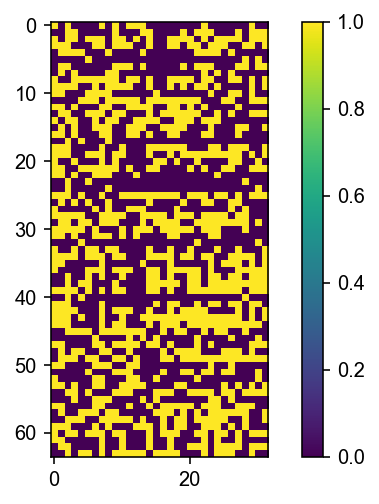

In [19]:
hash_key = lsh.get_lsh_dpe(mem_keys, dpe)

plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

In [21]:
qs_input  = np.squeeze(qs_new)
qs_input /= abs(qs_input).max()


q_hash = lsh.get_lsh_dpe(qs_input, dpe)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y_new)):
    if i==0:
        continue
        
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.21052631578947367


In [22]:
qs_input  = np.squeeze(qs)
qs_input /= abs(qs_input).max()

q_hash = lsh.get_lsh_dpe(qs_input, dpe)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y)):
    if i==0:
        continue
        
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.44488977955911824


## Linear correction

In [23]:
rand_vecs = np.random.rand(64, 1000)
rand_vecs = rand_vecs*2 - 1
vec_pos, vec_neg = lsh.vec_pn(rand_vecs)


out_pos = dpe.multiply(
            0, 
            vec_pos, 
            c_sel=[0, 64], 
            r_start=0, mode=0, Tdly=500)

out_neg = dpe.multiply(
            0, 
            vec_neg, 
            c_sel=[0, 64], 
            r_start=0, mode=0, Tdly=500)

output = out_pos - out_neg

In [24]:
g_true = np.ones((64,64)) * 50e-6
output_soft = rand_vecs.T @ g_true
output_soft2 = rand_vecs.T @ g

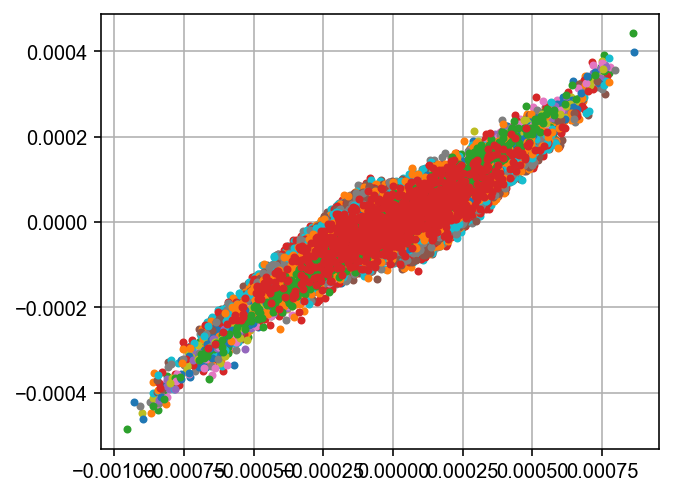

In [37]:
plt.figure(figsize=(5,4))

for c in range(output.shape[1]):
    plt.plot(output_soft2[:,c], output[:,c], '.')

In [38]:
lin_cor_lsh = []
for c in range(output.shape[1]):
    lin_cor_lsh.append( np.polyfit(output[:,c], output_soft2[:,c], 1))
    
output_cor = dpe.lin_corr(output, lin_cor_lsh)

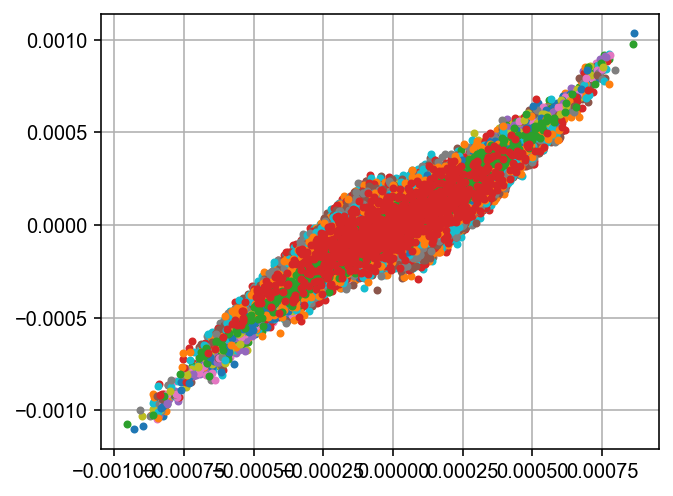

In [40]:
plt.figure(figsize=(5,4))

for c in range(output.shape[1]):
    plt.plot(output_soft2[:,c], output_cor[:,c], '.')

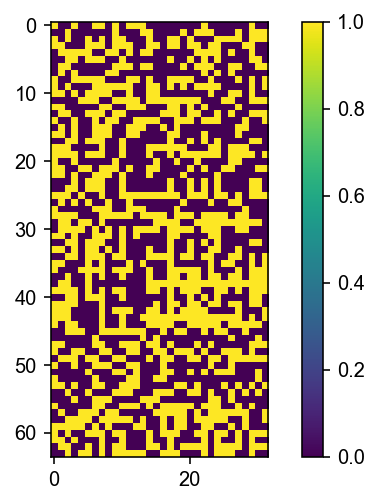

In [41]:
hash_key = lsh.get_lsh_dpe_cor(mem_keys, dpe, lin_cor_lsh)

plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

In [45]:
qs_input  = np.squeeze(qs_new)
qs_input /= abs(qs_input).max()


q_hash = lsh.get_lsh_dpe_cor(qs_input, dpe, lin_cor_lsh)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y_new)):
    if i==0:
        continue
        
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.5263157894736842


In [46]:
y_preds

array([25, 11, 11, 20, 25, 24, 24, 22, 25, 11, 25, 25, 25, 25,  1, 25, 25,
       11, 25])

In [43]:
qs_input  = np.squeeze(qs)
qs_input /= abs(qs_input).max()


q_hash = lsh.get_lsh_dpe_cor(qs_input, dpe, lin_cor_lsh)

y_true = []
y_preds= []

for i, (q, yy) in enumerate(zip(q_hash, y)):
    distance  = hamming(q, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.448


## Bipolar linear correction

In [95]:
rand_vecs = np.random.rand(64, 1000)

rand_vecs = rand_vecs*2 - 1

vec_pos, vec_neg = vec_pn(rand_vecs)



# output = dpe.multiply(
#             0, 
#             rand_vecs, 
#             c_sel=[0, 64], 
#             r_start=0, mode=0, Tdly=500)

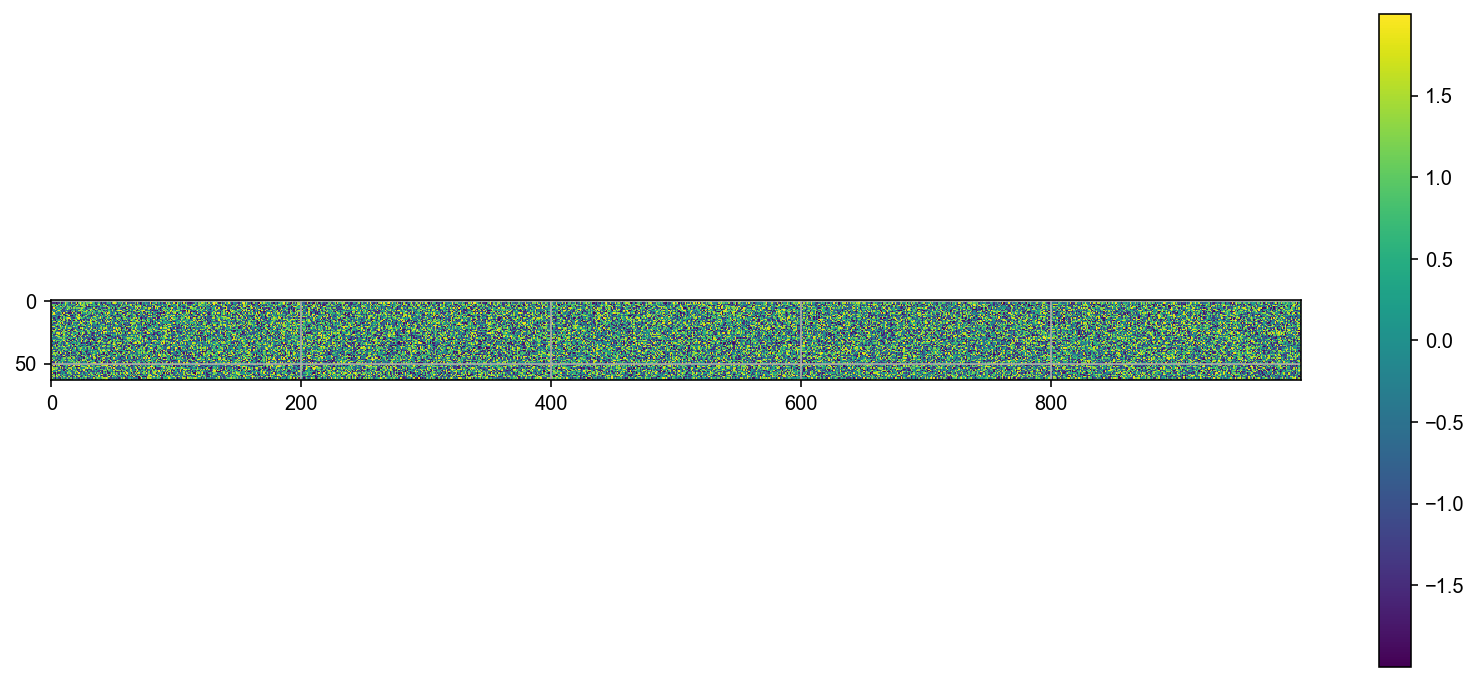

In [100]:
plt.imshow((vec_pos-vec_neg).reshape(64, 1000) - rand_vecs); plt.colorbar()

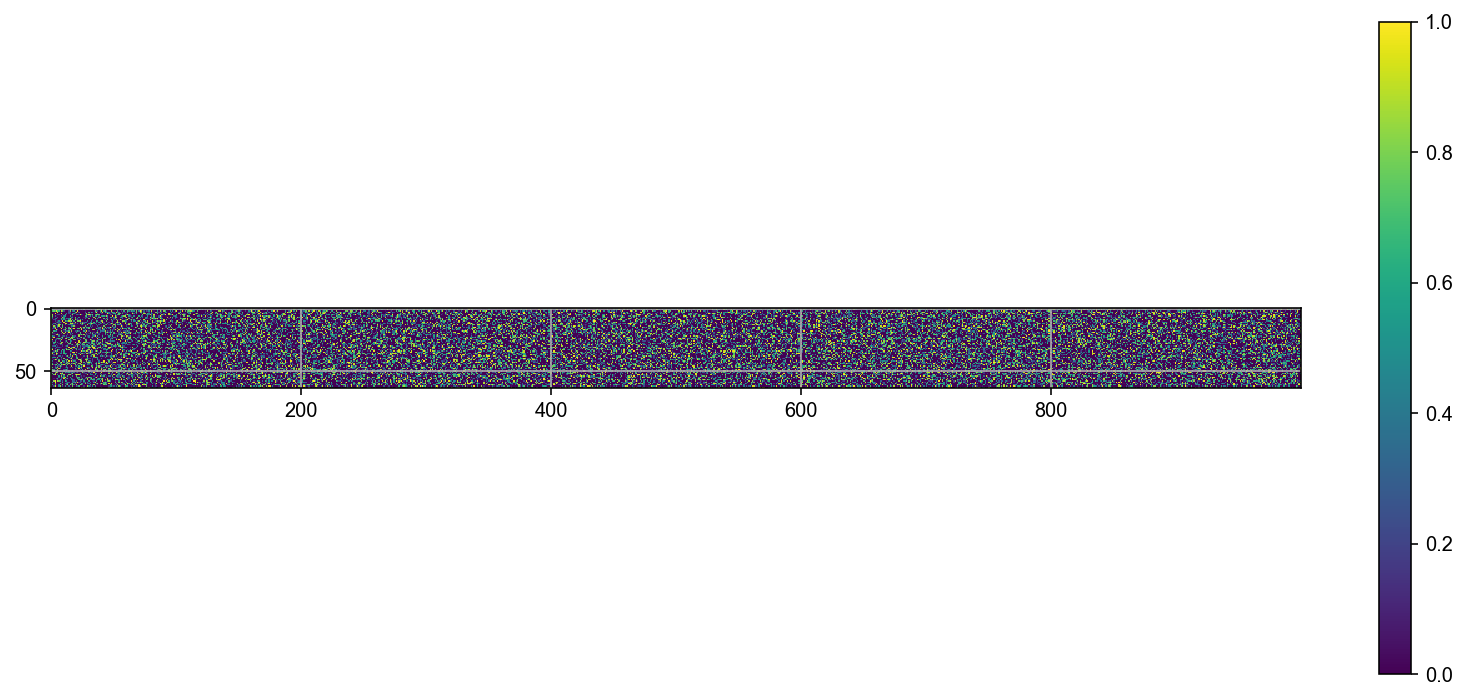

In [98]:
plt.imshow(vec_neg.reshape(64, 1000)); plt.colorbar()dd

In [101]:
rand_vecs.max()

0.9999861958106571

In [105]:
np.array(qs).min()

-22.4896